In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import statsmodels.api as sm
from patsy import dmatrices
import nltk
import re
from nltk.corpus import stopwords
from collections import Counter
from sklearn.manifold import MDS
import nltk
#nltk.download('punkt')
from collections import defaultdict
import requests
from bs4 import BeautifulSoup
#import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

Reading web-scraped reviews

In [7]:
df = pd.read_csv('/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Unstructured Data Analytics/Project/CSV_Bestsellers_reviews_corpus.csv')

Creating another copy of original dataframe to work on

In [8]:
df2 = df

Dropping of URL column

In [64]:
df2=df2.drop(['URL'],axis=1)

Checking of word frequency counts using regular TF-IDF to see important words in reviews and checking for Zipf's law as well. Creation of another copy to avoid making changes to original

In [65]:
df3=df2

In [11]:
all_reviews = " ".join(df2['Review'].astype(str))
words = all_reviews.lower().split()
word_counts = Counter(words)
most_common_100 = word_counts.most_common(100)
print(most_common_100)

[('the', 32335), ('and', 26726), ('a', 26602), ('i', 25997), ('it', 19545), ('is', 16915), ('to', 15821), ('this', 15321), ('of', 15249), ('in', 10042), ('but', 9975), ('for', 9281), ('that', 8202), ('my', 8140), ('on', 6855), ('like', 6734), ('with', 6646), ('not', 6258), ('you', 5316), ('as', 4811), ("it's", 4407), ('so', 4301), ('me', 4258), ('very', 4152), ('was', 3853), ('just', 3622), ('be', 3551), ('smell', 3502), ('have', 3498), ('more', 3435), ('fragrance', 3372), ('scent', 3355), ('one', 3210), ('if', 3062), ('at', 2915), ('or', 2885), ('smells', 2881), ('love', 2765), ('from', 2668), ('an', 2609), ('get', 2532), ('can', 2483), ('all', 2421), ('are', 2335), ('has', 2294), ('really', 2281), ('its', 2113), ('would', 2093), ('itâ€™s', 2034), ('when', 2002), ('sweet', 1853), ('perfume', 1831), ('what', 1775), ('it.', 1754), ('by', 1752), ('will', 1718), ('about', 1686), ('bottle', 1670), ('think', 1665), ('good', 1661), ('too', 1654), ('wear', 1612), ('some', 1586), ('first', 158

**The above is the 100 most common words along with their frequency which have been found in the dataset**

In [66]:
df3 = pd.DataFrame(most_common_100, columns=['Word', 'Frequency'])
df3['Rank'] = df3.index + 1
f1 = df3['Frequency'].iloc[0]  # Frequency of the most common word
df3['Zipf_Theoretical_Frequency'] = f1 / df3['Rank']

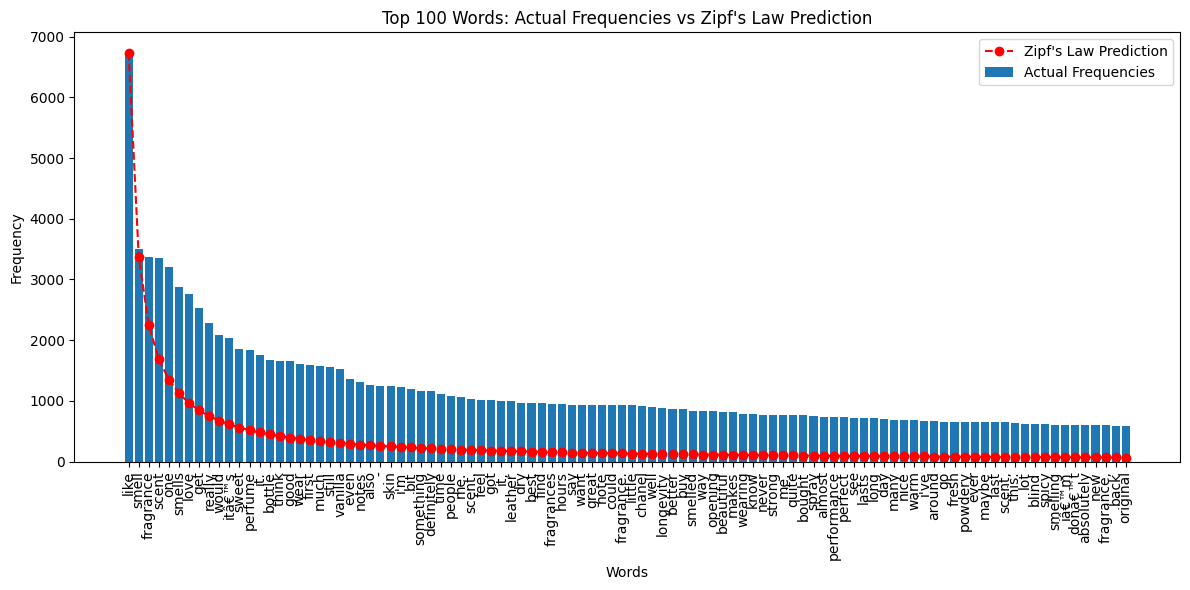

In [67]:
plt.figure(figsize=(12, 6))
plt.bar(df3['Word'][:100], df3['Frequency'][:100], label='Actual Frequencies')
plt.plot(df3['Word'][:100], df3['Zipf_Theoretical_Frequency'][:100], label="Zipf's Law Prediction", color='red', marker='o', linestyle='--')

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title("Top 100 Words: Actual Frequencies vs Zipf's Law Prediction")
plt.xticks(rotation=90) 
plt.legend()

plt.tight_layout()

plt.show()

In [77]:
df3['Log_Rank'] = np.log(df3['Rank'])
df3['Log_Frequency'] = np.log(df3['Frequency'])
y, X = dmatrices('Log_Frequency ~ Log_Rank', data=df3, return_type='dataframe')
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Log_Frequency   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     8949.
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           4.06e-98
Time:                        01:44:09   Log-Likelihood:                 155.43
No. Observations:                 100   AIC:                            -306.9
Df Residuals:                      98   BIC:                            -301.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8560      0.021    421.828      0.0

**Removal of stopwords and rechecking the important attributes which are showing up**

In [13]:
df4=df2

In [14]:
stop_words = set(stopwords.words('english'))

In [15]:
def remove_stopwords(review):
    words = review.split()  # Split the review into individual words
    filtered_words = [word for word in words if word.lower() not in stop_words]  # Remove stop words
    return ' '.join(filtered_words)  # Join the remaining words back into a string

df4['Review'] = df4['Review'].apply(remove_stopwords)

In [16]:
all_reviews = " ".join(df4['Review'].astype(str))
words = all_reviews.lower().split()
word_counts = Counter(words)
most_common_100 = word_counts.most_common(100)
print(most_common_100)

[('like', 6734), ('smell', 3502), ('fragrance', 3372), ('scent', 3355), ('one', 3210), ('smells', 2881), ('love', 2765), ('get', 2532), ('really', 2281), ('would', 2093), ('itâ€™s', 2034), ('sweet', 1853), ('perfume', 1831), ('it.', 1754), ('bottle', 1670), ('think', 1665), ('good', 1661), ('wear', 1612), ('first', 1586), ('much', 1575), ('still', 1558), ('vanilla', 1517), ('even', 1365), ('notes', 1318), ('also', 1255), ('-', 1244), ('skin', 1241), ("i'm", 1231), ('bit', 1201), ('something', 1168), ('definitely', 1163), ('time', 1111), ('people', 1085), ('me.', 1066), ('scent.', 1034), ('feel', 1022), ('got', 1008), ('it,', 1002), ('leather', 990), ('dry', 965), ('best', 960), ('find', 959), ('fragrances', 952), ('hours', 950), ('say', 938), ('want', 937), ('great', 937), ('note', 937), ('could', 932), ('fragrance.', 930), ('little', 930), ('chanel', 910), ('well', 903), ('longevity', 884), ('better', 871), ('buy', 868), ('smelled', 834), ('way', 830), ('opening', 829), ('beautiful', 

From the above we can see that there are multiple attributes which can classify a perfume

***Taking it one step higher and doing topic modeling to see how the results are***

In [43]:
#pip install --upgrade gensim

  Using cached scipy-1.13.1-cp312-cp312-macosx_12_0_arm64.whl.metadata (60 kB)
Using cached scipy-1.13.1-cp312-cp312-macosx_12_0_arm64.whl (30.4 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.0
    Uninstalling scipy-1.14.0:
      Successfully uninstalled scipy-1.14.0
Note: you may need to restart the kernel to use updated packages.


Checking coherence Score to see optimal number of topics 

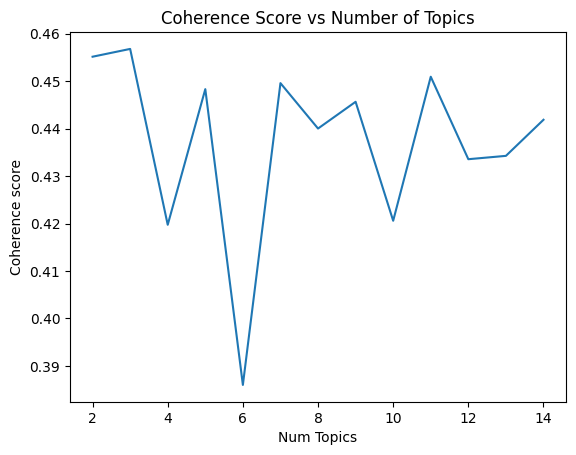

In [12]:
from gensim.models import CoherenceModel

# Training LDA model with different numbers of topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)
        model_list.append(model)
        
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    
    return model_list, coherence_values

# Set the range for number of topics (start=2, end=15 in this example)
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=df4['tokenized_review'], start=2, limit=15, step=1)

# Plots
import matplotlib.pyplot as plt

x = range(2, 15, 1)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.title("Coherence Score vs Number of Topics")
plt.show()

In [14]:
import re
from gensim import corpora
from gensim.models import LdaModel

# Preprocessing function to tokenize the text (stop words already removed)
def tokenize(text):
    text = re.sub(r'\W+', ' ', text)  
    return text.lower().split()  

# Apply the tokenize function to the 'Review' column
df4['tokenized_review'] = df4['Review'].apply(tokenize)


dictionary = corpora.Dictionary(df4['tokenized_review'])

# Corpus: List of bag-of-words for each review
corpus = [dictionary.doc2bow(review) for review in df4['tokenized_review']]

# number of topics
num_topics = 11

# Creating the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)

# Displaying the topics
topics = lda_model.print_topics(num_words=5)
for idx, topic in topics:
    print(f"Topic {idx}: {topic}")

Topic 0: 0.022*"like" + 0.014*"s" + 0.011*"smells" + 0.008*"bottle" + 0.007*"fragrance"
Topic 1: 0.017*"fragrance" + 0.011*"perfume" + 0.010*"love" + 0.009*"scent" + 0.008*"one"
Topic 2: 0.033*"áƒ" + 0.020*"ðÿ" + 0.015*"naxos" + 0.013*"oud" + 0.013*"ï"
Topic 3: 0.018*"i" + 0.014*"like" + 0.012*"fragrance" + 0.009*"it" + 0.008*"m"
Topic 4: 0.022*"like" + 0.011*"smells" + 0.010*"smell" + 0.010*"ùšù" + 0.009*"ø"
Topic 5: 0.021*"like" + 0.018*"s" + 0.014*"scent" + 0.013*"it" + 0.012*"smell"
Topic 6: 0.031*"scent" + 0.016*"fragrance" + 0.015*"hours" + 0.014*"skin" + 0.014*"10"
Topic 7: 0.052*"ð" + 0.037*"10" + 0.018*"cherry" + 0.013*"ñ" + 0.010*"cosy"
Topic 8: 0.040*"tobacco" + 0.026*"vanilla" + 0.023*"like" + 0.016*"smells" + 0.014*"sweet"
Topic 9: 0.289*"ø" + 0.194*"ù" + 0.031*"ú" + 0.030*"ûœ" + 0.023*"ùˆ"
Topic 10: 0.015*"scent" + 0.013*"fragrance" + 0.011*"s" + 0.010*"like" + 0.010*"smell"


**Doing Named Entity Recognition using Spacy to check for attributes**

Run the next two code blocks only if you have not set up spacy. 
Run install spacy if you have gensim running for you since you need to upgrade numpy to run spacy

In [1]:
#pip install spacy

In [18]:
#import spacy
#!python -m spacy download en_core_web_sm

In [37]:
import spacy

# Loading the spaCy model
nlp = spacy.load('en_core_web_sm')

# Applying NER to the reviews
df4['attributes'] = df4['Review'].apply(lambda review: [ent.text for ent in nlp(review).ents])

# Displaying the extracted attributes
df4[['Review', 'attributes']].head()

,Review,attributes
0,u ever wanted smell like honey backwood...... ...,[]
1,"easy get compliments Le Male Elixir,good smeel...","[Le Male Elixir, one]"
2,sometimes people need learn take joke,[]
3,smells like sexy honey!! thats best way descri...,[]
4,Kind slightly sweeter version Le Male Le Parfu...,"[Le Male Le Parfum, Le Male Le Parfum]"


Getting rid of reviews with empty attributes

In [56]:
df4_filtered = df4[df4['attributes'].map(lambda x: len(x) > 0)]

In [89]:
df4_filtered.head(2)

,URL,Title,Review,attributes,attributes_str
1,https://www.fragrantica.com/perfume/Jean-Paul-...,Le Male Elixir Jean Paul Gaultier cologne - a ...,"easy get compliments Le Male Elixir,good smeel...","[Le Male Elixir, one]",Le Male Elixir one
4,https://www.fragrantica.com/perfume/Jean-Paul-...,Le Male Elixir Jean Paul Gaultier cologne - a ...,Kind slightly sweeter version Le Male Le Parfu...,"[Le Male Le Parfum, Le Male Le Parfum]",Le Male Le Parfum Le Male Le Parfum


Performing wordcount on attributes column to check important attributes

In [58]:
all_attributes = " ".join(df4_filtered['attributes'].astype(str))
words = all_reviews.lower().split()
word_counts = Counter(words)
#word_counts 

In [60]:
df4_filtered['attributes'].value_counts()

attributes
[one]                                                                                                152
[first]                                                                                              104
[10/10]                                                                                               57
[One]                                                                                                 48
[Iâ€]                                                                                                 47
                                                                                                    ... 
[LOVE, first]                                                                                          1
[Chanel, 5, EDP & EDT, EDP, one, 2 days, 5, EDP & EDT, last hour]                                      1
[Eau Premiere, Chanel, two, one, 2015, iris heart, Chanel, 5, Eau, Chanel]                             1
[third, one, love summer, Eau De, fall sprin

Creating a list of all attributes possible and cross referencing it here to see important attributes

In [55]:
from collections import Counter

# Defining the list of perfume-related words (attributes)
perfume_attributes = [
    'floral', 'woody', 'citrus', 'fruity', 'fresh', 'musky', 'spicy', 'sweet', 'oriental', 'powdery', 'gourmand',
    'vanilla', 'sandalwood', 'amber', 'jasmine', 'rose', 'lavender', 'musk', 'patchouli', 'vetiver', 'bergamot',
    'leather', 'cedar', 'orange blossom', 'long-lasting', 'strong', 'intense', 'light', 'sillage', 'projection',
    'evening', 'daytime', 'summer', 'winter', 'spring', 'fall', 'office', 'date', 'casual', 'nostalgic','sweeter','honey'
]

all_attributes = " ".join(df4_filtered['attributes'].astype(str))

words = all_attributes.lower().split()

filtered_words = [word for word in words if word in perfume_attributes]

word_counts = Counter(filtered_words)

print(word_counts.most_common())

[('vanilla', 32), ('intense', 15), ('rose', 14), ('spring', 13), ('summer', 12), ('honey', 9), ('fall', 9), ('date', 9), ('sweet', 6), ('light', 6), ('winter', 5), ('jasmine', 5), ('strong', 4), ('fruity', 4), ('leather', 4), ('musk', 3), ('fresh', 3), ('lavender', 2), ('woody', 2), ('patchouli', 2), ('vetiver', 2), ('oriental', 1), ('sandalwood', 1), ('evening', 1), ('musky', 1), ('daytime', 1), ('sweeter', 1), ('powdery', 1), ('sillage', 1), ('floral', 1), ('amber', 1)]


<br>

**Performing Sentiment Analysis for considering only positive reviews and redoing everything**

In [78]:
df5=df2

In [80]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/advaith/nltk_data...


True

In [84]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# Applying sentiment analysis on the 'Review' column in df2
df5['sentiment'] = df5['Review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Filtering reviews with positive sentiment (compound score > 0)
df5_positive = df5[df5['sentiment'] > 0]

# Droping the sentiment column (optional)
df5_positive = df5_positive.drop(columns=['sentiment'])

In [83]:
len(df5_positive)

8826

**Removal of Stopwords**

In [85]:
df5_positive['Review'] = df5_positive['Review'].apply(remove_stopwords)

**Running Named Entity Recognition**

In [87]:
import spacy

# Loading the spaCy model
nlp = spacy.load('en_core_web_sm')

# Applying NER to the reviews
df5_positive['attributes'] = df5_positive['Review'].apply(lambda review: [ent.text for ent in nlp(review).ents])

# Displaying the extracted attributes
df5_positive[['Review', 'attributes']].head()

,Review,attributes
0,u ever wanted smell like honey backwood...... ...,[]
1,"easy get compliments Le Male Elixir,good smeel...","[Le Male Elixir, one]"
2,sometimes people need learn take joke,[]
3,smells like sexy honey!! thats best way descri...,[]
4,Kind slightly sweeter version Le Male Le Parfu...,"[Le Male Le Parfum, Le Male Le Parfum]"


In [88]:
df5_positive_filtered = df5_positive[df5_positive['attributes'].map(lambda x: len(x) > 0)]

Performing wordcount on attributes column to check important attributes

In [203]:
all_attributes = " ".join(df5_positive_filtered['attributes'].astype(str))
words = all_reviews.lower().split()
word_counts = Counter(words)

**Writing word_counts with words >=10 to a csv file for a manual check**

In [116]:
import pandas as pd
from collections import Counter

# Converting the word counts to a DataFrame
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])

mask = word_counts_df['Count']>=10
word_counts_df = word_counts_df[mask]


# Writing the DataFrame to a CSV file
word_counts_df.to_csv('word_counts.csv', index=False)

print("Word counts have been written to 'word_counts.csv'")

Word counts have been written to 'word_counts.csv'


**Loading of corpus from Kaggle**

In [2]:
df_k = pd.read_csv('/Users/advaith/Desktop/MSBA Related coursework/Fall Term/Unstructured Data Analytics/Project/Final Datasets/perfumes_table.csv')

*Renaming notes to attributes and title to Title for easier working in following code blocks*

In [3]:
df_k = df_k.rename(columns={'notes':'attributes','title':'Title'})

*Creating another copy to work on*

In [4]:
df_k2 = df_k

**Removal of products from top brands from kaggle corpus to retrieve remaining brands and corresponding reviews**

In [9]:
df_k2 = df_k2[~df_k2['url'].isin(df['URL'])]

In [10]:
df_k2 = df_k2[~df_k2['Title'].isin(df['Title'])]

Grouping by Title and taking average of rating and considering only worst 8000 products

In [11]:
df_k2_worst = df_k2.groupby(['Title', 'url'],as_index=False)['rating'].mean()
df_k2_worst= df_k2_worst.sort_values(by='rating')
df_k2_worst = df_k2_worst.head(8000)

Cross referencing the worst 8000 to filter the kaggle dataset 

In [25]:
df_k2_filtered = df_k2

In [26]:
df_k2_filtered = df_k2_filtered[df_k2_filtered['url'].isin(df_k2_worst['url'])]

In [27]:
len(df_k2_filtered)

8000

In [31]:
#df_k2_filtered.head(1)

Attributes are already present, so not doing Named Entitiy Recognition

Hence, Proceeding to performing wordcount on attributes column to check important attributes

In [29]:
all_attributes_worst = " ".join(df_k2_filtered['attributes'].astype(str))
words = all_attributes_worst.lower().split()
word_counts = Counter(words)

**Writing word_counts with words >=10 to a csv file for a manual check**

In [30]:
import pandas as pd
from collections import Counter

# Convert the word counts to a DataFrame
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])

mask = word_counts_df['Count']>=10
word_counts_df = word_counts_df[mask]


# Write the DataFrame to a CSV file
word_counts_df.to_csv('word_counts_worst.csv', index=False)

print("Word counts have been written to 'word_counts_worst.csv'")

Word counts have been written to 'word_counts_worst.csv'


**Pulling attributes from reviews as well and checking by doing Named Entity Recognition**

In [18]:
import spacy

# Loading the spaCy model
nlp = spacy.load('en_core_web_sm')

# Applying NER to the reviews
df_k2_filtered['rev_attributes'] = df_k2_filtered['reviews'].apply(lambda review: [ent.text for ent in nlp(review).ents])

# Displaying the extracted attributes
df_k2_filtered[['reviews', 'rev_attributes']].head()

,reviews,rev_attributes
0,[],[]
1,[],[]
2,"[""the opening is too sharp that it reminds me ...","[neroli, fig, neroli, fig, daily, Neroli, VCA,..."
3,['I must ask. What part of the country did thi...,"[San Antonio, TX]"
4,['Beautiful and uplifting. Initially fresh and...,"[an hour, about 2 hours, summer, Italian, 90 m..."


In [19]:
df_k2_filtered = df_k2_filtered[df_k2_filtered['rev_attributes'].map(lambda x: len(x) > 0)]

In [22]:
all_attributes = " ".join(df_k2_filtered['rev_attributes'].astype(str))
words = all_attributes.lower().split()
word_counts = Counter(words)

In [24]:
import pandas as pd
from collections import Counter

# Converting the word counts to a DataFrame
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])

mask = word_counts_df['Count']>=10
word_counts_df = word_counts_df[mask]


# Writing the DataFrame to a CSV file
word_counts_df.to_csv('word_counts_worst_spacy.csv', index=False)

print("Word counts have been written to 'word_counts_worst_spacy.csv'")

Word counts have been written to 'word_counts_worst_spacy.csv'
